In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import matplotlib.dates as mdates
import numpy as np

In [3]:
listafile=glob.glob("2023*.csv")

In [4]:
listafile

['2023-10-04.csv',
 '2023-10-05.csv',
 '2023-10-06.csv',
 '2023-10-07.csv',
 '2023-10-08.csv',
 '2023-10-09.csv',
 '2023-10-10.csv',
 '2023-10-11.csv',
 '2023-10-12.csv',
 '2023-10-13.csv',
 '2023-10-14.csv',
 '2023-10-15.csv',
 '2023-10-16.csv',
 '2023-10-17.csv',
 '2023-10-18.csv',
 '2023-10-19.csv',
 '2023-10-20.csv',
 '2023-10-21.csv',
 '2023-10-24.csv',
 '2023-10-25.csv',
 '2023-10-26.csv']

In [5]:
data=[]
for files in listafile:
  data.append(pd.read_csv(files))
datafull=pd.concat(data,ignore_index=True)

In [6]:
datafull

,Datetime,Humedad,Temperatura,Presion
0,2023-10-04 16:24:08,37.12,35.67,810.23
1,2023-10-04 16:25:06,37.37,35.83,810.23
2,2023-10-04 16:25:51,37.10,35.64,810.25
3,2023-10-04 16:26:36,37.37,35.62,810.24
4,2023-10-04 16:27:22,37.45,35.56,810.24
...,...,...,...,...
947,2023-10-26 20:00:02,40.45,36.27,812.12
948,2023-10-26 20:30:01,39.60,36.15,812.41
949,2023-10-26 21:00:02,40.14,36.22,812.67
950,2023-10-26 21:30:02,40.07,36.09,813.00


In [7]:
Time=pd.to_datetime(datafull["Datetime"][:],format="%Y-%m-%d %H:%M:%S")

In [8]:
datafull2=datafull.drop("Datetime",axis=1)

In [9]:
datafull2.insert(0,"Time",Time,True)

In [10]:
datagood=datafull2.sort_values(by="Time",ignore_index=True)

In [11]:
datagood['Presion'].replace(0,np.nan,inplace=True)

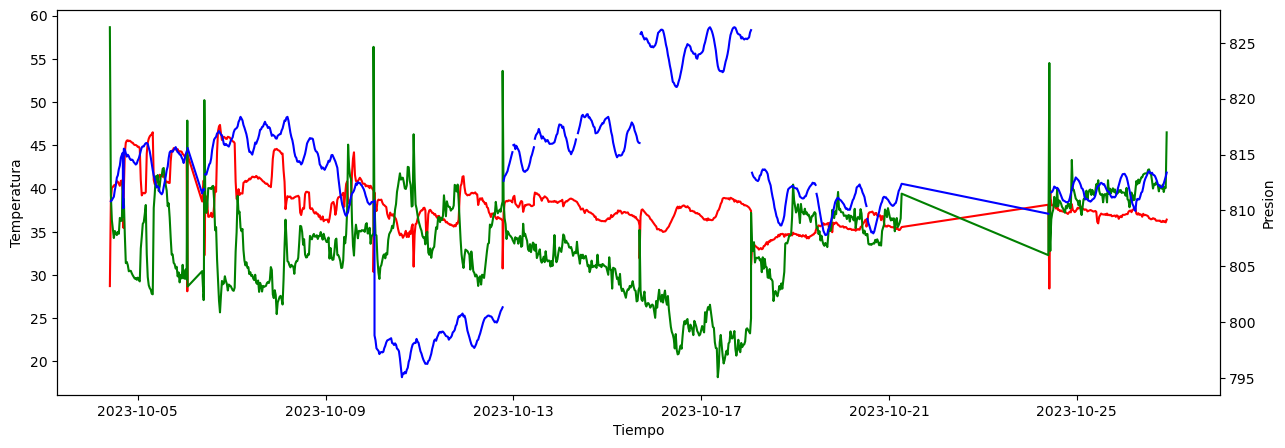

In [12]:
fig,(ax1)=plt.subplots(figsize=(15,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura")
ax1.plot(datagood['Time'],datagood[' Temperatura'],label="Temperatura",color="r")
ax1.plot(datagood['Time'],datagood['Humedad'],label="Humedad",color="g")
#fig.autofmt_xdate()
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(datagood['Time'],datagood['Presion'],label=("Humedad"),color="b")

El primer dia los datos varían mucho debido a que estaba siendo ajustado el raspberry, pero se obvservan como los siguientes dias los datos son muy parecidos la temperatura tiene pequeños cambios pero sigue una tendencia entre los 35 y 38 grados, en la humedad si hay mas variación pero tambien sigue una tendencia, pero en las mediciones de la presión se obvserva que casi se mantuvo constante todos los días.

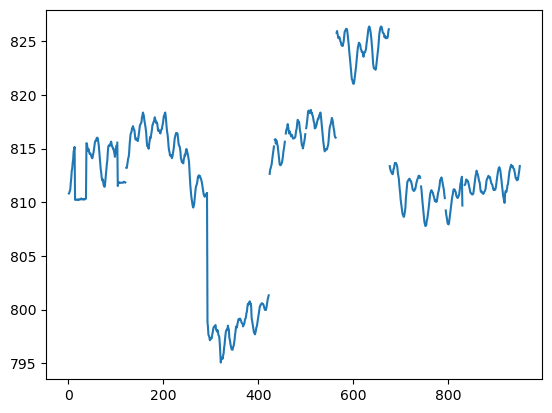

In [13]:
plt.plot(datagood['Presion'])

In [18]:
datagood['Presion'].interpolate(method="polynomial",order=2,inplace=True)

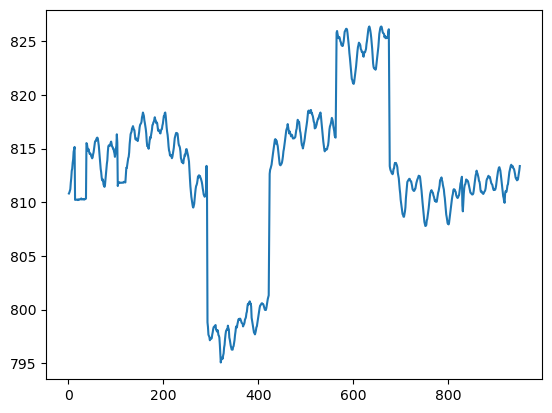

In [20]:
plt.plot(datagood["Presion"])
ax.

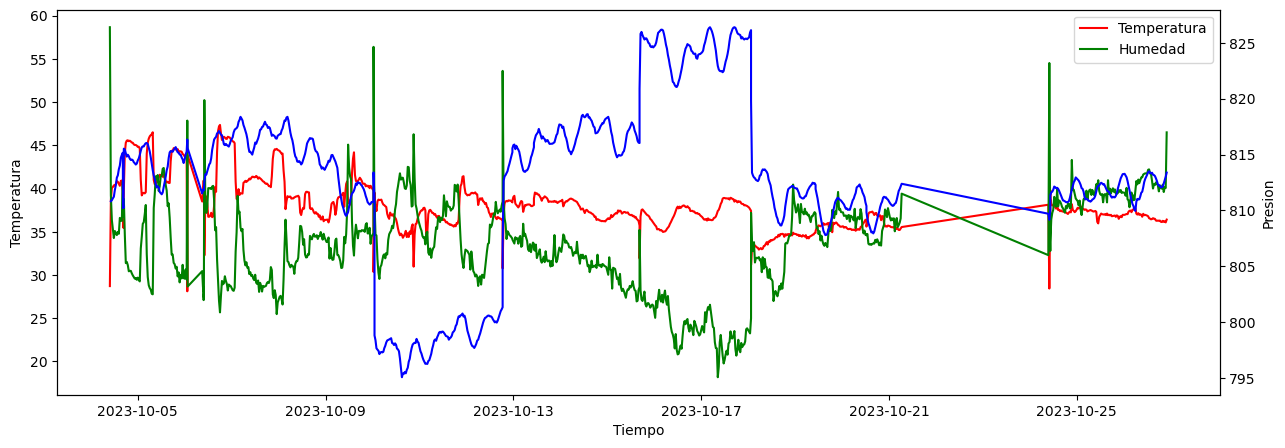

In [38]:
fig,(ax1)=plt.subplots(figsize=(15,5))
ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Temperatura")
ax1.plot(datagood['Time'],datagood[' Temperatura'],label="Temperatura",color="r")
ax1.plot(datagood['Time'],datagood['Humedad'],label="Humedad",color="g")
#fig.autofmt_xdate()
ax2=ax1.twinx()
ax2.set_ylabel("Presion")
ax2.plot(datagood['Time'],datagood['Presion'],label=("Humedad"),color="b")
ax1.legend()
